# Milestone 2

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## Task 3 - Method Chaining
### Relative Import

In [2]:
from Scripts.project_functions import load_and_process
dogs = load_and_process('../data/raw/ShelterDogs.xls')
dogs

,ID,age,sex,breed,date_found,adoptable_from,date_posted,color,coat_length,size,neutered,month_found,year_found
0,23807,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,12,2019
1,533,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,12,2019
2,23793,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,12,2019
3,23795,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,12,2019
4,23806,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,427,13.75,male,German Shepherd Dog Mix,2006-06-01,2006-06-01,2006-11-29,red,short,medium,yes,6,2006
2768,109,13.33,female,"German Pointer, Pointer Mix",2007-01-15,2007-01-15,2007-03-16,black and white,short,medium,NaN,1,2007
2769,110,13.75,male,Pumi Mix,2007-01-15,2007-01-15,2007-03-17,striped,medium,medium,NaN,1,2007
2770,389,14.25,female,"German Pointer, Greyhound, Pointer Mix",2006-08-01,2006-08-01,2006-08-20,black and white,short,medium,yes,8,2006


---

## Task 4 - Exploratory Data Analysis 

In [3]:
dogs.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2772.0,1815.533189,4124.299703,1.00,176.00,572.50,1471.00,23809.0
age,2772.0,8.058362,3.659501,0.15,5.67,8.42,10.83,15.0
month_found,2772.0,6.212843,3.565666,1.00,3.00,6.00,9.00,12.0
year_found,2772.0,2013.710678,3.301409,2005.00,2011.00,2013.00,2016.00,2019.0


In [4]:
dogs.describe(include=object).T

,count,unique,top,freq
sex,2772,2,male,1563
breed,2772,274,Unknown Mix,1451
color,2772,23,black,592
coat_length,2772,4,short,1873
size,2772,3,medium,1842
neutered,1750,2,yes,1106


Text(0.5, 1.0, 'Top 20 shelter dog breeds')

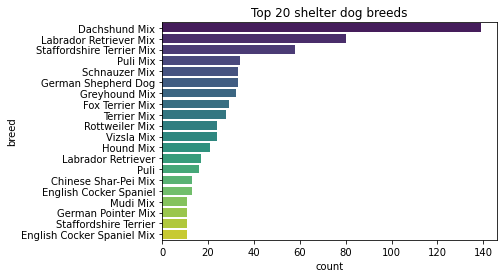

In [5]:
breeds = dogs['breed'].value_counts().index[2:22] #excluding unknown breed

sns.countplot(data = dogs,
             y = 'breed',
             order = breeds,
             palette = 'viridis')
plt.title('Top 20 shelter dog breeds')

Text(0.5, 1.0, 'Age distribution of shelter dogs')

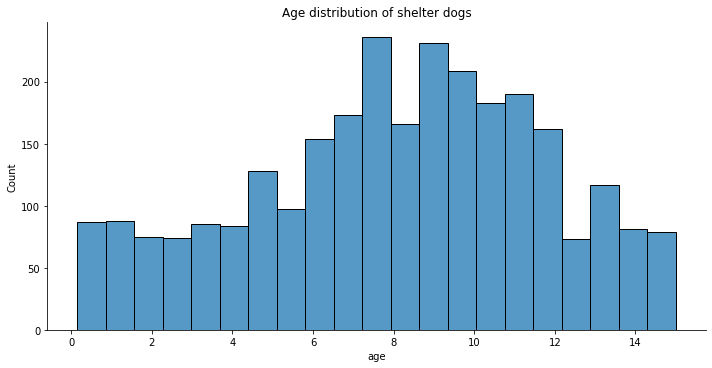

In [6]:
sns.displot(data = dogs,
           x = 'age',
           aspect = 2)

plt.title('Age distribution of shelter dogs')

Text(0.5, 1.0, 'Sex of shelter dogs')

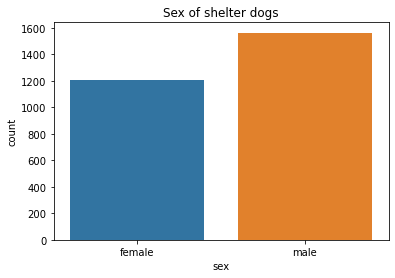

In [7]:
sns.countplot(data = dogs,
            x = 'sex')

plt.title('Sex of shelter dogs')

Text(0.5, 1.0, 'Neutured shelter dogs')

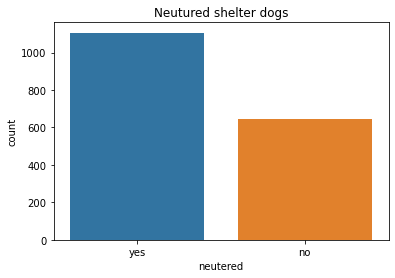

In [8]:
sns.countplot(data = dogs,
            x = 'neutered',
            order = ['yes','no'])

plt.title('Neutured shelter dogs')

Text(0.5, 1.0, 'Coat length of shelter dogs')

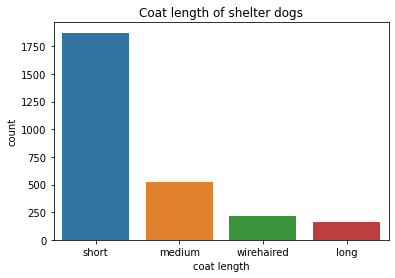

In [9]:
sns.countplot(data = dogs,
             x = 'coat_length',
             order = ['short','medium','wirehaired','long'])
plt.xlabel('coat length')

plt.title('Coat length of shelter dogs')

Text(0.5, 1.0, 'Size of shelter dogs')

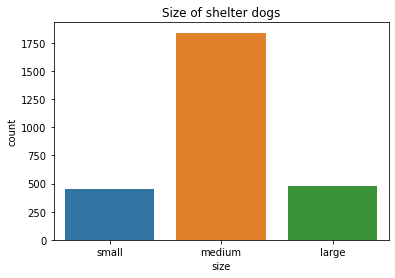

In [10]:
sns.countplot(data = dogs,
             x = 'size')

plt.title('Size of shelter dogs')

Text(0.5, 1.0, 'Coat color of shelter dogs')

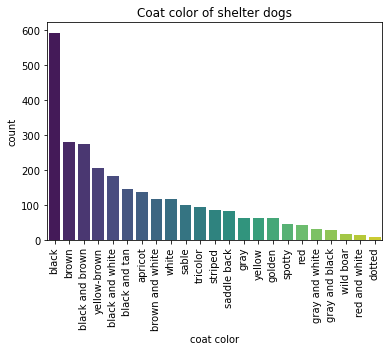

In [11]:
sns.countplot(data = dogs,
             x = 'color',
             palette = 'viridis',
             order = dogs['color'].value_counts().index[:])

plt.xlabel('coat color')
plt.xticks(rotation = 90)
plt.title('Coat color of shelter dogs')

Text(0.5, 1.0, 'Month shelter dogs were found')

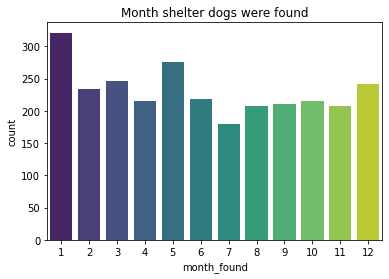

In [12]:
sns.countplot(data = dogs,
             x = 'month_found',
             palette = 'viridis')

plt.title('Month shelter dogs were found')

Text(0.5, 1.0, 'Year shelter dogs were found')

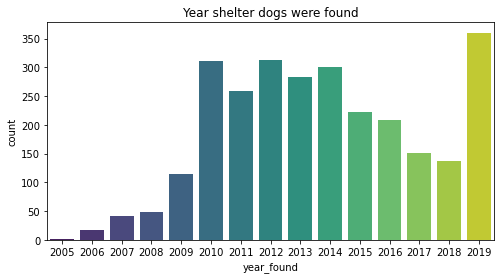

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data = dogs,
             x = 'year_found',
             palette = 'viridis')

plt.title('Year shelter dogs were found')

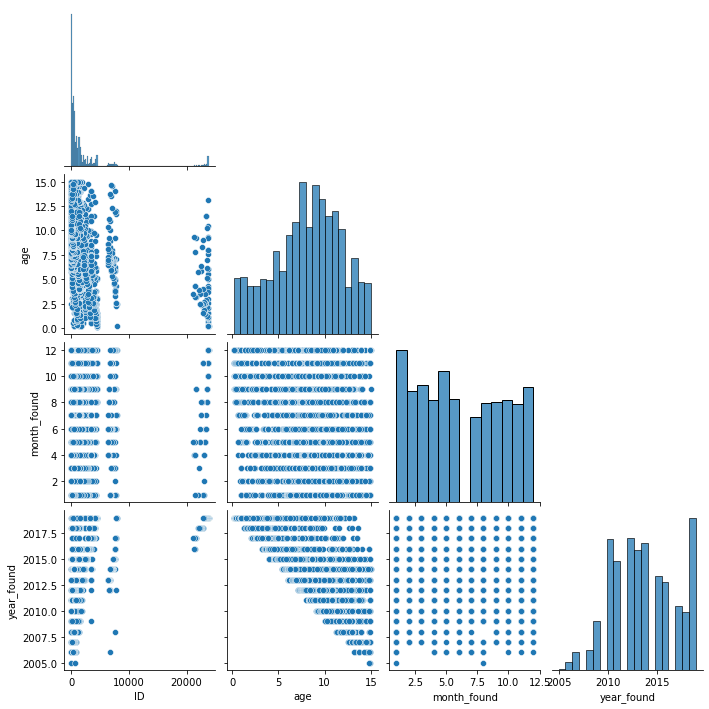

In [14]:
sns.pairplot(data = dogs, corner = True)

---

## Task 5 - Answer Research Questions

**Q1: Are the most common breeds more likely to be male or female?**

Text(0.5, 1.0, 'Ten most common shelter dog breeds by sex')

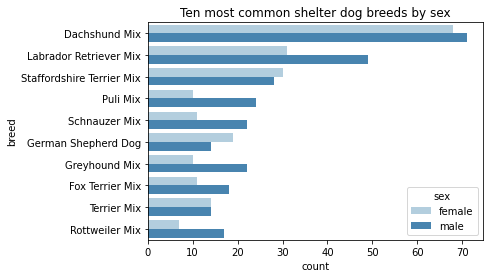

In [16]:
breeds = dogs['breed'].value_counts().index[2:12] #excluding unknown breed

sns.countplot(data = dogs,
              y = 'breed',
              hue = 'sex',
              order = breeds,
              palette = 'Blues')
plt.title('Ten most common shelter dog breeds by sex')

As shown in the figure above it appears that the ten most common breeds found in the shelter are majority male. This is higher than expected, as there are overall more male dogs in the shelter, but in the case of top breeds the ratio of male to female is much larger than overall. This could mean that male dogs are more often abandoned or given up, or it could mean that people are more likely to adopt female dogs.

**Q2: What age are the most common dogs?**

Text(0.5, 1.0, 'Age of ten most common dog breeds')

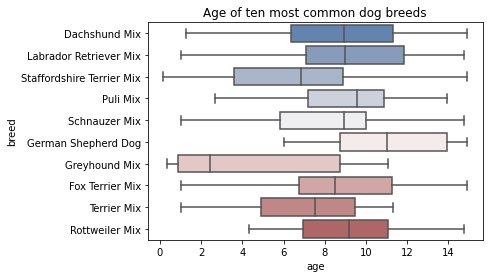

In [17]:
breeds = dogs['breed'].value_counts().index[2:12] #excluding unknown breed

sns.boxplot(data = dogs,
            y = 'breed',
            x = 'age',
            palette = 'vlag',
            order = breeds)
plt.title('Age of ten most common dog breeds')

Text(0.5, 1.0, 'Age distribution of ten most common dog breeds')

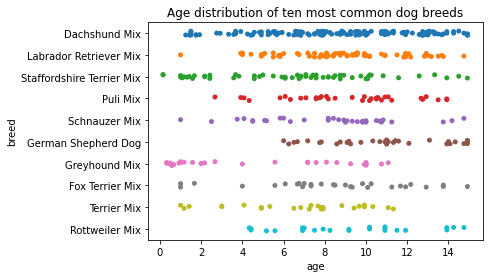

In [18]:
breeds = dogs['breed'].value_counts().index[2:12] #excluding unknown breed

sns.stripplot(data = dogs,
              y = 'breed',
              x = 'age',
              palette = 'tab10',
              order = breeds)
plt.title('Age distribution of ten most common dog breeds')

The most common breeds of dogs are between 8 and 10 years old on average, but there are some outliers. For example, greyhound mix breed in the shelter are generallly much younger than other breeds. Also, greyhound mix and terrier mix breeds do not seem to live as long as other breeds, as these are the only breeds that do not have any dogs older than 12 years. Another notable point is that german shepard and rottweiler mix breeds are only present in the shelter at older ages, suggesting that these dogs are often given up by their owner at an older age.

**Q3: Is there a relationship between the age of a dog and if they are neutered?**

Text(0.5, 1.0, 'Age of neutered dogs')

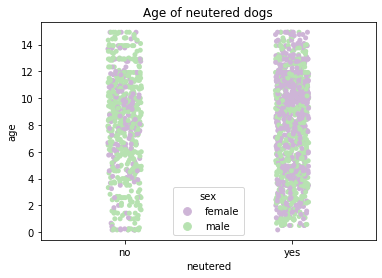

In [19]:
sns.stripplot(data = dogs,
              y = 'age',
              x = 'neutered',
              hue = 'sex',
              palette = 'PRGn',
              jitter = True)
plt.title('Age of neutered dogs')

While there is no apparent relationship between a dog being neutered and their age (i.e. dogs of all ages are neutered), there is a relationship between age and a dog not being neutered. It appears that dogs of a young age (<4) and old age (>12) are more likely to be neutured compared to middle age dogs. In the case of young dogs this makes sense as dogs are usually neutered at a young age.

**Q4: What year were the most common breeds brought into the shelter?**

Text(0.5, 1.0, 'Breed of dogs found each year')

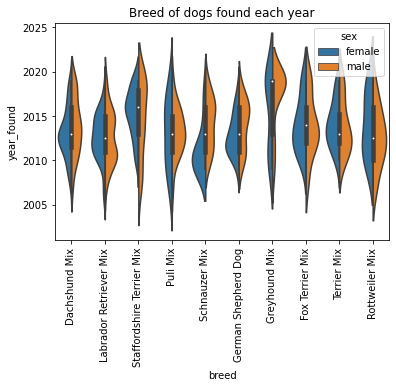

In [20]:
breeds = dogs['breed'].value_counts().index[2:12] #excluding unknown breed

ax = sns.violinplot(data = dogs,
                    y = 'year_found',
                    x = 'breed',
                    order = breeds,
                    hue = 'sex',
                    split = True)

plt.xticks(rotation = 90)
plt.title('Breed of dogs found each year')

Most of the common breeds were brought into the shelter in the early 2010s to 2015, while greyhound mix had more dogs brought in closer to 2019.